# Apresentação Redes Neurais - NLP
Fernanda Bufon e Danielle Tavares

### Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import ipywidgets as wg
from ipywidgets import interactive, fixed
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline

## Função Lógica XOR

Vamos tentar resolver o problema da função lógica XOR de forma linear interativamente:

In [2]:
def plot_line(w1, w2, b):
    x1, x2 = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.figure(0, figsize=(10,4))
    plt.subplot(1,2,2)
    plt.scatter(x[:,0], x[:,1], c=y.ravel(), s=100, cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array([w1, w2]).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr')

    y_pred = np.dot(x, np.array([w1, w2]).T) + b
    y_bin = np.where(y_pred <= 0, 0, 1)
    print('{0} => {1}'.format(y_pred, y_bin))

    plt.subplot(1,2,1)
    mse = np.mean((y.ravel() - y_bin)**2)
    loss.append(mse)
    plt.plot(loss)
    plt.title('Loss')

    plt.show()

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


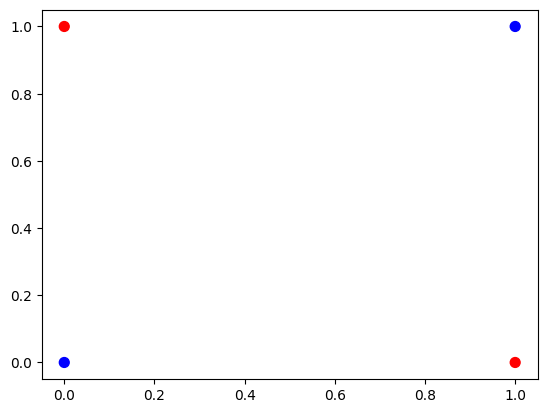

interactive(children=(FloatSlider(value=0.0, description='w1', max=1.0, min=-1.0, step=0.01), FloatSlider(valu…

In [3]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1, 1, 0]]).T

print(x, y, sep='\n')
plt.scatter(x[:,0], x[:,1], c=y.ravel(), s=50, cmap='bwr')
loss = []

interactive_plot = interactive(plot_line, w1=(-1,1,0.01), w2=(-1,1,0.01), b=(-1.5, 1.5, 0.01))
interactive_plot

Como vimos acima, diferentemente da função AND e OR, a função XOR não consegue ser resolvida / separada por uma função linear. Qual a solução? CAMADAS OCULTAS!!

Agora, vamos criar uma pequena Rede Neural para resolvermos o problema XOR. A rede segue a seguinte arquitetura:

![Formato de Rede definida para resolver o problema XOR](https://i.imgur.com/JDmk8ME.png)

Figura 1: Arquitetura para resolução do problema XOR, adaptada de 'Speech and Language Processing, 3ª edição (rascunho)' por Dan Jurafsky e James H. Martin, 2024.

In [20]:
def step_function(x):
    """ Função de ativação degrau. """
    return 1 if x > 0 else 0

def neural_network(x1, x2):
    # Pesos das conexões para as camadas ocultas
    weights_hidden = np.array([[1, 1],  # Pesos para h1
                               [1, 1]]) # Pesos para h2

    # Bias das camadas ocultas
    biases_hidden = np.array([0, -1])  # Bias para h1 e h2

    # Entradas
    inputs = np.array([x1, x2])

    # Calculando as saídas das camadas ocultas como soma linear
    hidden_linear_output = np.dot(weights_hidden, inputs) + biases_hidden

    # Aplicando a função degrau às saídas das camadas ocultas
    hidden_layer_output = np.array([step_function(x) for x in hidden_linear_output])

    # Pesos da camada oculta para a saída
    weights_output = np.array([1, -2])

    # Bias da saída
    bias_output = 0

    # Calculando a entrada final para a saída
    final_input = np.dot(weights_output, hidden_layer_output) + bias_output

    # Aplicando a função degrau à saída final
    output = step_function(final_input)
    return output

# Widgets para entrada de dados
x1 = widgets.IntText(value=0, description='Digite o valor de x1 (0 ou 1):')
x2 = widgets.IntText(value=0, description='Digite o valor de x2 (0 ou 1):')
button = widgets.Button(description="Submit")

def on_button_clicked(b):
    # Captura os valores dos widgets e chama a função neural_network
    result = neural_network(x1.value, x2.value)
    print("Saída da rede neural:", result)

button.on_click(on_button_clicked)
display(x1, x2, button)

IntText(value=0, description='Digite o valor de x1 (0 ou 1):')

IntText(value=0, description='Digite o valor de x2 (0 ou 1):')

Button(description='Submit', style=ButtonStyle())

Saída da rede neural: 1
Saída da rede neural: 0
Saída da rede neural: 1
Saída da rede neural: 0


Perceba que nós acabamos de criar uma espécie de rede neural com parâmetros estrategicamente definidos para resolver nosso problema. **Mas o que podemos fazer em casos onde não sabemos quais são os parâmetros necessários?**

## Perceptron:

Para termos uma ideia intuitiva do Perceptron e de Redes Neurais, vamos começar com uma ferramenta interativa.

Esse código foi feito pelo Arnaldo Gualberto, doutor em Deep Learning, no curso [Manual Prático em Deep Learning](https://www.udemy.com/course/redes-neurais/learn/lecture/18857722#overview) da Udemy.

In [23]:
df = pd.read_csv('medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


Primeiramente, vamos dar uma olhada no nosso gráfico:

Text(0, 0.5, 'Peso')

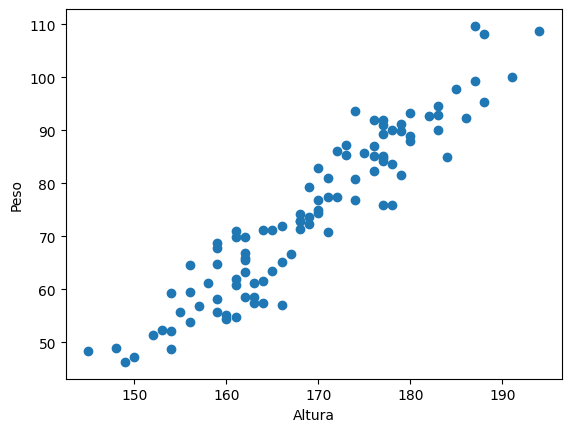

In [24]:
x = df.Altura
y = df.Peso

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

Agora vamos criar um código para plotar a função linear e resolver manualmente.

In [25]:
def plot_line(w, b):
    plt.figure(0, figsize=(20,4))
    plt.subplot(1,3,3)
    plt.scatter(x, y)
    y_pred = x*w + b
    plt.plot(x, y_pred, c='red')
    plt.xlim(140, 210)
    plt.ylim(40, 120)

    plt.subplot(1,3,2)
    x_ = np.array([0, x.max()])
    y_ = x_*w + b
    plt.scatter(x, y)
    plt.plot(x_, y_, c='red')
    plt.xlim(0, 210)
    plt.ylim(-160, 120)

    plt.subplot(1,3,1)
    mse = np.mean((y - y_pred)**2)
    loss.append(mse)
    plt.plot(loss)
    plt.title('Loss')

    plt.show()

Com o código abaixo, conseguimos mudar o bias e o peso da nossa função linear para atingirmos a menos loss e, consequentemente, resolver o problemas de regressão. Observe que nessa etapa não estamos implementando a função de ativação.

In [26]:
loss = []

interactive_plot = interactive(plot_line, w=(1, 1.5, 0.01), b=(-200, 0, 1))
output = interactive_plot.children[-1]
output.layout_height = '350px'
interactive_plot


interactive(children=(FloatSlider(value=1.25, description='w', max=1.5, min=1.0, step=0.01), IntSlider(value=-…

Agora vamos rodar o modelo de regressão linear para vermos quais são os melhores valores do peso e do bias para encaixar nos nossos dados.

In [27]:
reg = LinearRegression()
reg.fit(x.values.reshape(-1,1), y)
print("w: {:.2f} \nb: {:.2f}".format(reg.coef_[0], reg.intercept_))

w: 1.37 
b: -157.47


Observe que nós descobrimos o valor ideal dos pesos e dos bias de acordo com a Loss, ou seja, com o objetivo de minimizarmos. O processo que a gente seguiu foi:
1. Começar com um valor aleatório para o peso e bias;
2. Verificar o valor da Loss;
3. Mudar o valor do peso de acordo com a primeira Loss encontrada;
4. Mudar o valor do bias de acordo com a primeira Loss encontrada;
5. Verificar o valor da Loss;
6. Mudar o valor do peso...

Basicamente, estamos fazendo o que a Rede Neural faz: *APRENDENDO!*

Assim como fizemos, a rede aprende de acordo com a Loss obtida - e a relação da Loss com o parâmetro analisado.

## Implementando uma Rede Neural utilizando Python:
Nosso objetivo será prever se uma pessoa vai adquirir um plano de saúde ou não. O código foi feito pelo Dhaval Patel, dono do canal [codebasics](https://www.youtube.com/@codebasics), no vídeo [Implement Neural Network In Python](https://www.youtube.com/watch?v=PQCE9ChuIDY&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=13&ab_channel=codebasics)

### Preparação dos dados:

In [29]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [31]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

### Definindo funções e fazendo a rede neural:

Nossa função de ativação escolhida vai ser a Sigmoid.

In [32]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

O código a seguir define a função *log_loss*, que calcula a perda logarítmica (log loss), uma métrica comum para avaliar o desempenho de modelos de classificação. A função ajusta as previsões para garantir que elas estejam dentro do intervalo (epsilon, 1-epsilon) para evitar erros de logaritmo de zero. Em seguida, calcula a média do logaritmo negativo da probabilidade prevista para a classe verdadeira, ponderada pela verdade real, para todas as observações. Essa métrica é útil para medir quão bem um modelo de classificação prevê as classes corretas. 

In [36]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

Agora, vamos criar nossa rede neural:

In [37]:
class myNN:
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0

    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"\nFinal weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")

    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)

            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d

            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

Este código define uma classe chamada `myNN` que representa uma rede neural simples para classificação binária. A rede utiliza o método de descida de gradiente para otimizar seus parâmetros.
#### Método `__init__`
* Inicializa os pesos (`w1`, `w2`) e o bias com valores iniciais de 1 e 0, respectivamente. Estes são os parâmetros que serão ajustados durante o treinamento.

#### Método `fit`
* Aceita as características de entrada X, o vetor de saída y, o número de épocas epochs e um limiar de perda loss_thresold.
* Usa a função gradient_descent para ajustar os pesos e o bias com base nos dados de entrada.
* Imprime os valores finais dos pesos e do bias após o treinamento.

#### Método `predict`
* Calcula a soma ponderada das entradas usando os pesos e o bias ajustados.
* Aplica a função de ativação sigmoid para obter a probabilidade de a saída ser da classe 1.

#### Método `gradient_descent`
* Inicializa os pesos e o bias com valores de 1 e 0.
* Define uma taxa de aprendizado `rate` de 0.5.
* Executa um loop para um número especificado de epochs:
* Calcula a soma ponderada das características de entrada.
* Aplica a função sigmoid para obter as previsões `y_predicted`.
* Calcula a perda usando a função `log_loss`.
* Calcula os gradientes dos pesos e do bias com relação à perda.
* Atualiza os pesos e o bias subtraindo uma fração dos gradientes.
* Imprime os valores dos parâmetros e da perda a cada 50 épocas.
* Se a perda for menor ou igual ao `loss_thresold`, interrompe o treinamento.
* Retorna os valores ajustados dos pesos e do bias.

Este código é um exemplo de como implementar uma rede neural simples do zero, utilizando o método de descida de gradiente para otimizar os parâmetros com base na perda logarítmica.

In [38]:
customModel = myNN()
customModel.fit(X_train_scaled, y_train, epochs=5000, loss_thresold=0.3)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:50, w1:1.503319554173139, w2:1.108384790367645, bias:-1.2319047301235464, loss:0.5675865113475955
Epoch:100, w1:2.200713131760032, w2:1.2941584023238903, bias:-1.6607009122062801, loss:0.5390680417774752
Epoch:150, w1:2.8495727769689085, w2:1.3696895491572747, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:200, w1:3.443016970881804, w2:1.404221862446503, bias:-2.2571369883752723, loss:0.5005011269691375
Epoch:250, w1:3.982450494649577, w2:1.423912732932123, bias:-2.494377365971801, loss:0.48654089537617085
Epoch:300, w1:4.4721795220959155, w2:1.438787986553552, bias:-2.7073878119223735, loss:0.47508146406327934
Epoch:350, w1:4.917245868007634, w2:1.4525660781176122, bias:-2.901176333556766, loss:0.46561475306999006
Epoch:400, w1:5.3225621674147305, w2:1.4664810071905663, bias:-3.0787595797907787, loss:0.4577474350773423
Epoch:450, w1:5.69260053360137, w2:1.4808112468106

In [41]:
def prediction_function(age, affordibility):
    weighted_sum = 10.932992483821772*age + 1.8824075292964162*affordibility + -5.734992702048112
    return sigmoid_numpy(weighted_sum)

y_pred = prediction_function(.47, 1)

if(y_pred > 0.5):
  y_pred = 1
else:
  y_pred = 0

In [42]:
print(y_pred)

1


## Redes Neurais para Análise de Sentimentos
Vamos importar dados de reviews do Play Store e criar uma rede neural para classificar o comentário em positivo, neutro ou negativo. Utilizaremos o BOW para transformar o texto em números para que a rede possa entender.

Obs: O dataset, a preparação do ambiente e o pré-processamento dos dados foram feitos pelo professor [Sávio Teles](https://www.linkedin.com/in/savio-teles-6707b111?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAAAJuaXQBgXnWG-u9VN8L4bYxB8zMEy5dQPA&lipi=urn%3Ali%3Apage%3Ad_flagship3_search_srp_all%3BxTHvVOGcR1yYLjWzMDshDg%3D%3D) no Workshop de LLMs.

### Preparação dos dados:

#### Configurando o ambiente de execução

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth',1000)

#### Explorando os dados de treinamento
Iremos baixar o arquivo `reviews_complete.csv` que contém quase **12k reviews** de aplicativos do PlayStore.

In [2]:
!gdown 1wf-3sf_zkSi1VMhVSMcWfyX7wWVEY2R5

Downloading...
From: https://drive.google.com/uc?id=1wf-3sf_zkSi1VMhVSMcWfyX7wWVEY2R5
To: c:\Users\ferna\OneDrive\Documentos\RedesNeurais\reviews.csv

  0%|          | 0.00/6.78M [00:00<?, ?B/s]
  8%|▊         | 524k/6.78M [00:00<00:04, 1.36MB/s]
 15%|█▌        | 1.05M/6.78M [00:00<00:03, 1.69MB/s]
 23%|██▎       | 1.57M/6.78M [00:00<00:02, 2.07MB/s]
 31%|███       | 2.10M/6.78M [00:01<00:01, 2.35MB/s]
 46%|████▋     | 3.15M/6.78M [00:01<00:01, 3.14MB/s]
 54%|█████▍    | 3.67M/6.78M [00:01<00:00, 3.43MB/s]
 62%|██████▏   | 4.19M/6.78M [00:01<00:00, 2.97MB/s]
 77%|███████▋  | 5.24M/6.78M [00:01<00:00, 3.35MB/s]
 85%|████████▌ | 5.77M/6.78M [00:01<00:00, 3.56MB/s]
100%|██████████| 6.78M/6.78M [00:02<00:00, 4.21MB/s]
100%|██████████| 6.78M/6.78M [00:02<00:00, 3.16MB/s]


In [3]:
df = pd.read_csv("reviews.csv")

In [4]:
df.head(1)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,sentiment
0,28d8bde6-09a2-4b70-81d0-98bca41600f0,Hipólito Mota,https://play-lh.googleusercontent.com/a-/ACNPEu_S0oCMDOcgrovV02UhlQG-HTIdzp--kxK4a4yk,"Horrível. Informação enganadora, principalmente nas medidas. Dois produtos com a mesma suposta medida de peito e ombros, e os dois completamente diferentes. Um é claramente 2 ou 3 tamanhos acima do outro. Além do mais muito caro para a qualidade que apresenta o material. Primeira e última compra.",1,9,8.6.6,2022-11-04 12:58:10,"Olá, obrigada pela sua avaliação. Caso tenha algum problema, não hesite em contactar connosco via opção de suportar em APP. Por favor, clique ""mim""-→suportar-→serviço ao cliente e depois insira【Fala com agente】e entregue um bilhete para nós. Estamos sempre dispostos em servi-lo.",2022-11-05 01:31:28,most_relevant,com.zzkko,0


#### Preparando o ambiente

Foi utilizada a bilioteca nltk para facilitar o processamento dos textos.

Aqui utilizamos quatro pacotes do nltk:

* **stopwords**: pacote com uma lista de stopwords, incluíndo a língua portuguesa.
* **punkt**: pacote para tokenização que divide um texto em uma lista de sentenças utilizando um algoritmo não supervisionado.
* **wordnet**: banco de dados léxicos. Aqui utilizamos na operação de Lemmatization.
* **omw-1.4**: Open Multilingual Wordnet. Aqui utilizamos na operação de Lemmatization.

In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
!pip install spacy
!python -m spacy download pt_core_news_sm

You should consider upgrading via the 'C:\Users\ferna\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 13.0/13.0 MB 4.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


You should consider upgrading via the 'c:\Users\ferna\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [7]:
import spacy
nlp = spacy.load('pt_core_news_sm')

#### Pré-processamento dos dados

O pré-processamento dos dados textuais de treinamento envolvem as seguintes tarefas:

* **Normalização**: remoção de dígitos, pontuação, lower case, etc..
* **Tokenização**: segmenta o texto em palavras
* **Remoção de stopwords**: são um conjunto de palavras bastante utilizadas em uma linguagem e, geralmente, não tem importância para entender o significado principal do texto. Exemplo: "o", "da", "é" e "para".
* **Lemmatization**:  processo de deflexionar uma palavra para determinar o seu lema. Por exemplo, as palavras gato, gata, gatos, gatas são todas formas do mesmo lema: gato.

In [8]:
doc = nlp(u'O tema do workshop até que é bom. O problema é o professor!')
doc.text.split()

['O',
 'tema',
 'do',
 'workshop',
 'até',
 'que',
 'é',
 'bom.',
 'O',
 'problema',
 'é',
 'o',
 'professor!']

In [9]:
from textblob import Word
def pre_processing(df, stop_words):
    # Lower case
    df['content'] = df['content'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
    # remoção de dígitos ou números
    df['content'] = df['content'].str.replace('\d+', '')
    # Remoção de stop words
    df['content'] = df['content'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))
    # Lemmatization
    df['content'] = df['content'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))
    return df
stop_words = stopwords.words('portuguese')
df = pre_processing(df, stop_words)

Pré-processamento dos dados utilizando `TfidfVectorizer` para construir o Bag of Word. Parâmetros:

* **ngram_range**: os limites inferiores e superiores da faixa de valores para os n-grams. Por exemplo, o ngram_range igual a (1,2) significa que podem ser gerados unigramas e bigramas.
* **sublinear_tf**: aplica um scaling no tf, ou seja, substitui o tf por 1 + log(tf).

In [10]:
df['content'].head()

0                                                                                                                horrível . informação enganador , principalmente medida . dois produto mesmo suposto medida peito ombro , dois completamente diferente . claramente 2 3 tamanho acima outro . além caro qualidade apresentar material . primeiro último compra .
1    primeiro experiência plataformo . bom preço , variedade . entregar internacional prazo . entregar nacional péssima ! ! ! ! ainda recebir produto , atrasar com si nenhum contato . apenas rastreamento dizer q entregar .... qdo ? ? ? decepcionar . continuar nenhum informação pedido super atrasar ! ! ! . " suporte " responder nenhum contato . absurdo
2                     gostar nada de esse plataforma compra , fiz pedir devido problema sério endereço cancelar pedir , porém , cancelar endereço lá simplesmente existir tento contato suporte técnico consigo . horrível ! ! primeiro compra nunca mais , cliente shopee lá todo assistência preci

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
cv = TfidfVectorizer(ngram_range=(1,2),
                     sublinear_tf=True)
text_counts = cv.fit_transform(df['content'])

In [12]:
text_counts.shape

(12000, 129590)

### Implementação da Rede Neural:

Agora que temos os dados em formato numérico (que estão na variável "text_counts") podemos criar e treinar nosso modelo utilizando o tensorflow.

In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:


# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['sentiment'], test_size=0.25, random_state=5)

# Convertendo as labels em números
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Converter a matrix esparsa do Scipy para um tensor esparso.
def to_sparse_tensor(sparse_matrix):
    coo = sparse_matrix.tocoo()  # Converte a matriz pro formato Cordinate
    indices = np.array(list(zip(coo.row, coo.col)), dtype=np.int64)  # Cria indices a partir das coordenadas de elementos não-zero.
    return tf.sparse.SparseTensor(indices=indices, values=coo.data, dense_shape=coo.shape) # retorna um SparceTensor - formato compatível com TensorFlow.

#Transformando X_train e X_test para o tensor esparso
train_sparse_tensor = to_sparse_tensor(X_train)
test_sparse_tensor = to_sparse_tensor(X_test)

# Garantindo que os tensores estão em odem
train_sparse_tensor = tf.sparse.reorder(train_sparse_tensor)
test_sparse_tensor = tf.sparse.reorder(test_sparse_tensor)

In [25]:
# Criando um modelo de rede neural sequencial que aceite o input esparso.
# O modelo tem número de input layers do tamanho do shape de cada vetor que representa o texto
# Possui uma camada oculta com 10 neurônios, com função de ativação ReLU
# A camada de saída possui três neurônios, e o resultado final é uma matriz de probabilidades (criada pelo softmax)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],), sparse=True),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# O Adam mantém uma taxa de aprendizado individual e adaptativa para cada parâmetro
# Calcula a divergência entre as distribuições de probabilidade previstas e as verdadeiras
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo com 5
model.fit(train_sparse_tensor, y_train, epochs=5, validation_data=(test_sparse_tensor, y_test))

Epoch 1/5


c:\Users\ferna\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4484 - loss: 1.0817 - val_accuracy: 0.6290 - val_loss: 0.9847
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8563 - loss: 0.8104 - val_accuracy: 0.6430 - val_loss: 0.8450
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9343 - loss: 0.4587 - val_accuracy: 0.6427 - val_loss: 0.7871
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9583 - loss: 0.2712 - val_accuracy: 0.6423 - val_loss: 0.7715
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9689 - loss: 0.1737 - val_accuracy: 0.6330 - val_loss: 0.7759


In [26]:
from sklearn import metrics

predicted = model.predict(test_sparse_tensor)
accuracy_score = metrics.accuracy_score(np.argmax(predicted, axis = 1), y_test)
print("Accuracy Score: ",accuracy_score)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy Score:  0.633


### Predição com dados reais do Play Store

Abaixo utilizamos alguns textos extraídos de reviews do Play Store para verificar o quão o modelo está bom em textos reais. Utilizamos 3 sentenças (1 positiva, 1 neutra e 1 negativa) para realizarmos a avaliação do modelo em algumas sentenças escolhidas.

In [27]:
class_names = ['negative', 'neutral', 'positive']

In [28]:
negative_review = """Péssimo para quem quer vender. Além das altas taxas cobradas, demora para atualizar os encaminhamentos do produto"""
neutral_review = """Muito prático e fácil de usar, mas para conseguir ajuda é terrível!"""
positive_review = """Eu adoro o app enjoei, em todos os sentidos, acho bem intuitivo, fácil de procurar os ítens que você está querendo comprar e a interface é linda, bem clean e agradável aos olhos."""
reviews = [negative_review, neutral_review, positive_review]

In [29]:
for review in reviews:
    review_vector = cv.transform([review])  # Vectorização
    review_sparse_tensor = to_sparse_tensor(review_vector)
    review_sparse_tensor = tf.sparse.reorder(review_sparse_tensor)  # Reordenar o tensor esparço
    prediction = model.predict(review_sparse_tensor)[0]
    predicted = np.argmax(prediction)
    print(f'Review text: {review}')
    print(f'Sentiment  : {class_names[predicted]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Review text: Péssimo para quem quer vender. Além das altas taxas cobradas, demora para atualizar os encaminhamentos do produto
Sentiment  : negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Review text: Muito prático e fácil de usar, mas para conseguir ajuda é terrível!
Sentiment  : neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Review text: Eu adoro o app enjoei, em todos os sentidos, acho bem intuitivo, fácil de procurar os ítens que você está querendo comprar e a interface é linda, bem clean e agradável aos olhos.
Sentiment  : positive


Fontes: https://github.com/codebasics/deep-learning-keras-tf-tutorial/tree/master, https://github.com/arnaldog12/Manual-Pratico-Deep-Learning e https://turing.inf.ufg.br/course/view.php?id=787